In [26]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np

# Reading and Understanding Data

In [27]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [28]:
#dropping ID and Award columns

df2 = df.drop(['ID#','Award?'], axis=1)
df2.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968


In [29]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


In [30]:
#standardize the data to normal distribution
from sklearn import preprocessing

df2_standardized = preprocessing.scale(df2)

df2_standardized = pd.DataFrame(df2_standardized)
df2_standardized.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975


# Scree Plot

Used to determine the clusters.

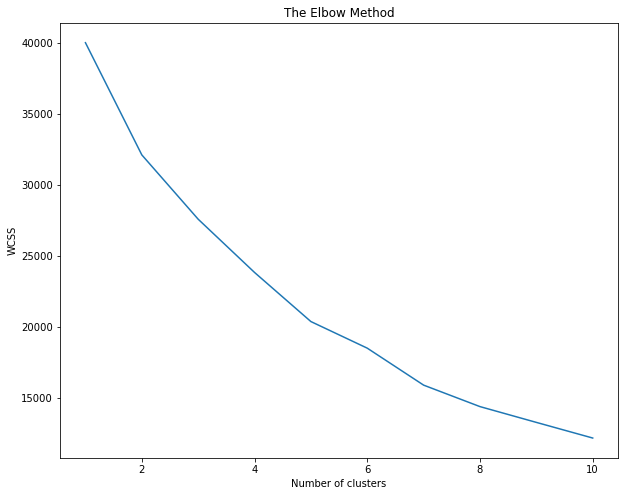

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df2_standardized)
    wcss.append(kmeans.inertia_)  #Inertia is WCSS
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#The scree plot levels off at k=2 and However, since spltting the dataset into 2 groups would not be very beneficial for segmenting frequent flyers, we further evaluate clusters for higher values of k.

In [114]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(df2_standardized) 

y_kmeans 

array([1, 1, 1, ..., 1, 1, 1])

In [115]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1 = y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)

# Adding cluster to our data set
df['cluster'] = cluster   #observations belonging to each cluster.

df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


# Cluster Analysis

In [116]:
Clust_1 = df[df['cluster']==1]
Clust_1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1
12,13,43382,0,2,1,1,11150,20,0,0,6924,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,1
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,1
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,1
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,1


In [117]:
Clust_2 = df[df['cluster']==2]
Clust_2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,6,16420,0,1,1,1,0,0,0,0,6942,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [118]:
Clust_3 = df[df['cluster']==3]
Clust_3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,3
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,3
22,23,20584,0,1,1,1,3450,11,3450,11,6884,0,3
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,3
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,3
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,3
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,3
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,3


In [119]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,,
1,1634.5,115439.0,138.5,3.7,1.0,1.0,38913.0,18.8,316.5,0.9,4823.2,0.6
2,2240.7,42723.3,104.6,1.2,1.0,1.0,4331.6,6.7,213.3,0.6,3696.7,0.2
3,1708.4,198856.6,790.4,2.2,1.0,1.0,32951.2,27.4,5383.1,15.9,4737.5,0.8


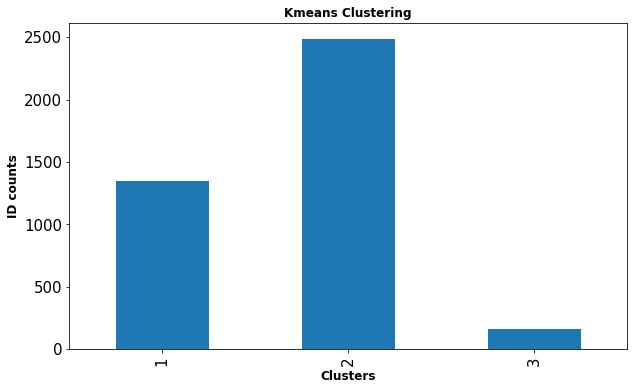

In [120]:
# Plotting barplot using groupby method to get visualize how many row no. of IDs in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['cluster']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# Insights:

<li>Cluster 2 is set of the recently acquired customer group as the Days since enrollment is lowest , moreover their flight transactions in last 12 months as well as the qualified miles for top class travel is also low.
    
<li>Cluster 1 also has customer group which have Days since enrollment is low, moreover their flight transactions in last 12 months as well as the qualified miles for top class travel is also low.
        
<li>Cluster 3 is the set of high vintage customers who have highest number of non-flight bonus transaction miles and highest miles eligible for award travel
    
    
 **<li>Cluster 0 and 1 can be Investigated further to identify their needs. Bring offers for them accordingly.**